In [23]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import elephant
from neo.core import SpikeTrain
from quantities import s,ms
from viziphant.rasterplot import rasterplot
from tools import *
from collections import defaultdict

In [24]:
pattern_size=0.25

In [25]:
def spikes_around_patterns(student_times,start):
    signal_times = np.loadtxt("pattern_times").T[0]
    times_from_pat = SpikesDistFromPat(np.array(student_times), pattern_size, signal_times, window=pattern_size*2, offset=pattern_size/2)
    all_spike_pat = []
    for i in range(len(times_from_pat[0])):
        if times_from_pat[0][i] > start:
            all_spike_pat.append(times_from_pat[1][i])

    all_spike_pat.sort()
    return all_spike_pat

In [26]:
signal_times = np.loadtxt("pattern_times").T[0]
student_indexes=np.loadtxt("data/spikes_student_index.data")
student_times=np.loadtxt("data/spikes_student_times.data")
teachers_indexes=np.loadtxt("data/spikes_teachers_index.data")
teachers_times=np.loadtxt("data/spikes_teachers_times.data")

In [27]:
data = np.loadtxt('spiketrains_0_input_pattern')

In [28]:
spikes_in_pattern = []
for i in data :
    if signal_times[1]<i[0]<signal_times[1]+pattern_size:
        spikes_in_pattern.append([i[0]-signal_times[1],i[1]])
    if signal_times[1]+pattern_size<i[0]:
        break
spikes_in_pattern = np.array(spikes_in_pattern)

In [29]:
spikes_in_pattern_to_learn = spikes_in_pattern[np.where(spikes_in_pattern[:,1]==0)[0]]

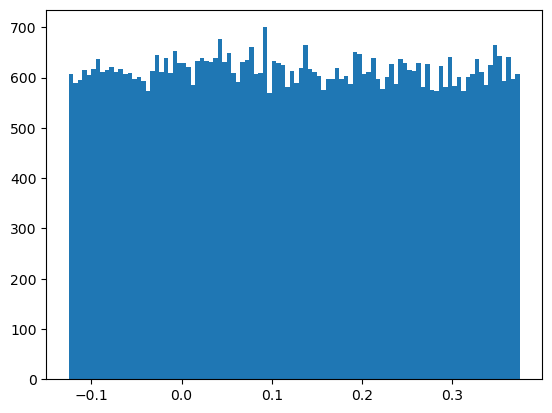

In [33]:
all_spike_pat = spikes_around_patterns(student_times,100)
plt.hist(all_spike_pat, bins=100);
#plt.eventplot(spikes_in_pattern_to_learn[:,0])

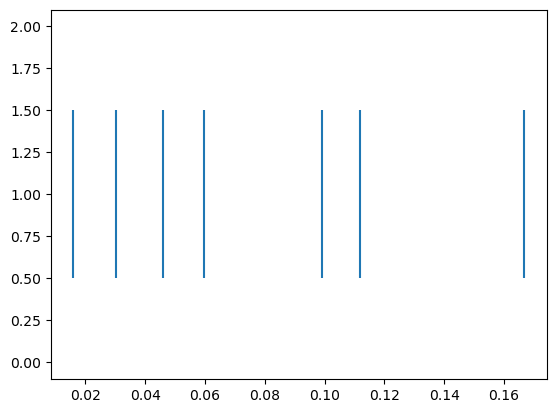

In [35]:
plt.eventplot(spikes_in_pattern_to_learn[:,0])

In [36]:
each_student_times = defaultdict(list)

for i in range(len(student_indexes)):
    index = student_indexes[i]
    each_student_times[index].append(student_times[i])
    

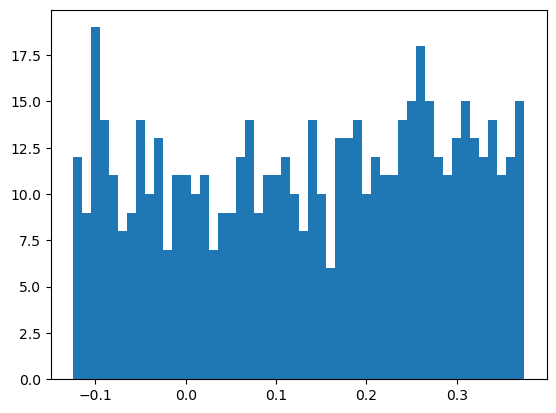

In [37]:
all_spike_pat = spikes_around_patterns(each_student_times[6],100)
plt.hist(all_spike_pat, bins=50);

In [38]:
max_time_spike = max(student_times)
spike_trains_neurons_students_neo=dict()
list_spike_trains_neurons_students_neo= []
for key in each_student_times:
    train = SpikeTrain(each_student_times[key]*s, t_stop=max_time_spike)
    spike_trains_neurons_students_neo[key] = train
    list_spike_trains_neurons_students_neo.append(train)

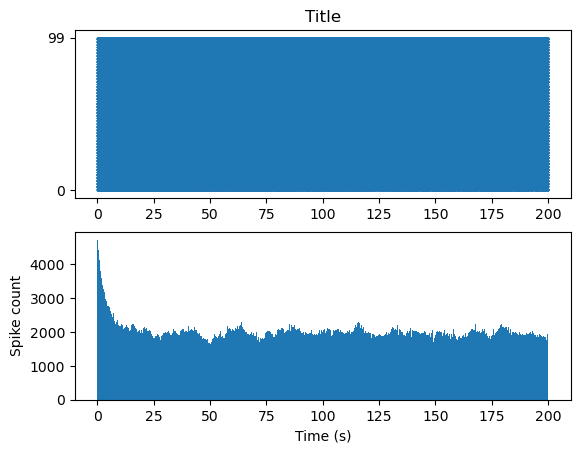

In [39]:
axes = rasterplot(list_spike_trains_neurons_students_neo, histogram_bins=500, title='Title', s=0.01)
plt.show()

In [40]:
teacher_neo =SpikeTrain(teachers_times*s, t_stop=max(teachers_times))

In [41]:
kernel = elephant.kernels.GaussianKernel(sigma=10 * ms)
rate_teacher = elephant.statistics.instantaneous_rate(teacher_neo,sampling_period=1 * ms,kernel=kernel)

In [42]:
sync_detector =np.loadtxt("data/sync_detector_voltage.data")

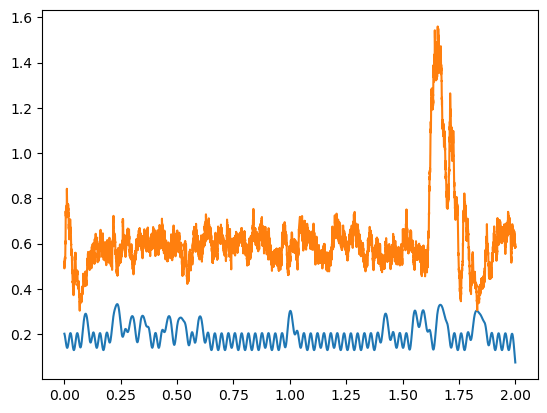

In [43]:
plt.plot(np.linspace(0,2,2000),rate_teacher[-2000:]/200)
plt.plot(np.linspace(0,2,20000),sync_detector[-20000:])

In [44]:
signal_times = np.loadtxt("pattern_times").T[0]
signal_times_in = signal_times[np.where(signal_times<200)[0]]

In [60]:
time_points = np.linspace(0,200,2000000)
pattern_size = 0.25
window = 1
sampling = 10000
pstc_detector = np.zeros(int(window*sampling))
time_frame =np.linspace(0,window,int(window*sampling))-(window/2)+(pattern_size/2)

ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[-3]] :
    ts_i+=1
    if ti<2000000:
        while time_points[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points[ti]:
                moment = time_points[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                #print(moment)
                pstc_detector[np.argmin(abs(time_frame-moment))]+=sync_detector[ti]
            if ti<2000000-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


In [61]:
time_points_teacher = np.linspace(0,200,200000)
sampling = 1000
pstc_detector_teacher = np.zeros(int(window*sampling))
time_frame_teacher =np.linspace(0,window,int(window*sampling))-(window/2)+(pattern_size/2)
rate_teacher_array =np.array(rate_teacher).flatten()
ti=0
ts_i=0
#for ts in signal_times[-20:] :
for ts in [signal_times[-3]] :
    ts_i+=1
    if ti<rate_teacher.size:

        while time_points_teacher[ti]<ts+(window/2)+(pattern_size/2):
            if ts-(window/2)+(pattern_size/2)<time_points[ti]:

                moment = time_points[ti]-ts
                #print(np.argmin(abs(time_frame-moment)))
                #print(moment)
                pstc_detector_teacher[np.argmin(abs(time_frame_teacher-moment))]+=rate_teacher_array[ti]
            if ti<rate_teacher.size-1:
                ti+=1
            else:
                break
    else :
        break
    print(ts_i)
    

1


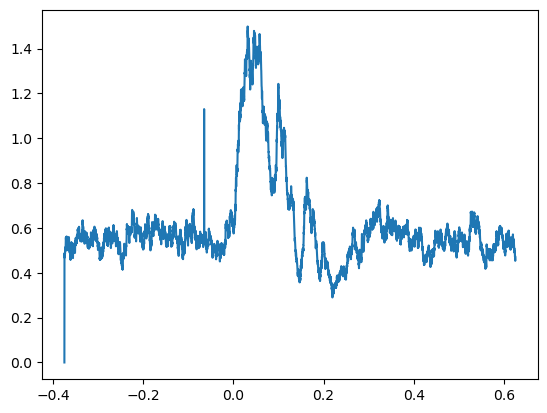

In [62]:
plt.plot(time_frame,pstc_detector)

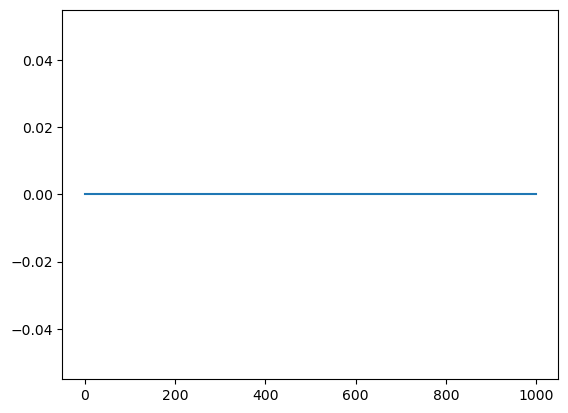

In [53]:
plt.plot(pstc_detector_teacher)